# Stroke Prediction Project

## Ringkasan Data
Stroke merupakan penyebab utama disabilitas di seluruh dunia dan menjadi penyebab kematian kedua terbanyak.  
Global Stroke Factsheet yang dirilis pada tahun 2022 mengungkapkan bahwa:

- Risiko seumur hidup untuk terkena stroke meningkat 50% dalam 17 tahun terakhir.
- Saat ini, 1 dari 4 orang diperkirakan akan mengalami stroke dalam hidupnya.
- Dari tahun 1990 hingga 2019 terjadi:
  - 70% peningkatan insiden stroke  
  - 43% peningkatan kematian akibat stroke  
  - 102% peningkatan prevalensi stroke  
  - 143% peningkatan Disability Adjusted Life Years (DALY)

Yang paling mencolok, 86% kematian akibat stroke dan 89% DALY terjadi di negara berpendapatan rendah dan menengah ke bawah, menimbulkan masalah serius bagi keluarga dengan sumber daya terbatas.

## Tujuan
Tujuan dari proyek ini adalah untuk memprediksi apakah seseorang akan mengalami stroke atau tidak, yang merupakan masalah klasifikasi.

Fokus utama adalah:
- Recall yang tinggi – untuk memastikan sebanyak mungkin kasus stroke terdeteksi.
- Meminimalkan false negatives – agar tidak melewatkan kasus stroke yang sebenarnya terjadi.

Recall sangat penting dalam konteks medis untuk menghindari kesalahan prediksi yang dapat berdampak serius bagi pasien.

## Lingkup Proyek
- Fokus pada Recall Score dan Feature Selection


## Deskripsi Dataset
- Sumber: Dataset dari Kaggle  
- Jumlah Data: 5110
- Jumlah Fitur: 12
- Jenis Data: Campuran numerik dan kategorikal


## Description of the Columns

| No | Column Name         | Description                                                                 |
|----|---------------------|-----------------------------------------------------------------------------|
| 1  | id                  | Unique identifier                                                           |
| 2  | gender              | "Male", "Female", or "Other"                                                |
| 3  | age                 | Age of the patient                                                          |
| 4  | hypertension        | 0 if the patient doesn't have hypertension, 1 if the patient has hypertension |
| 5  | heart_disease       | 0 if the patient doesn't have heart disease, 1 if the patient has heart disease |
| 6  | ever_married        | "No" or "Yes"                                                               |
| 7  | work_type           | "children", "Govt_job", "Never_worked", "Private", or "Self-employed"       |
| 8  | Residence_type      | "Rural" or "Urban"                                                          |
| 9  | avg_glucose_level   | Average glucose level in blood                                              |
| 10 | bmi                 | Body Mass Index                                                             |
| 11 | smoking_status      | "formerly smoked", "never smoked", "smokes", or "Unknown"*                  |
| 12 | stroke              | Target variable: 1 if the patient had a stroke, 0 if not                    |

**Note**: "Unknown" in `smoking_status` means that the information is unavailable for this patient.



# Importing Modules and Data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score
from scipy.stats import chi2_contingency
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

import pickle

In [16]:
df = pd.read_csv('dataset_stroke.csv')

# Preprocessing

In [17]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [18]:
df.shape

(5110, 12)

In [19]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


* There are 5 columns with categorical data
* 7 columns are numerical
* 1 column, BMI, has 201 missing values

## Data Cleaning

In [21]:
# drop the 'id' column
df = df.drop(columns='id', axis=1)

In [22]:
# select all columns with numerical values
df.select_dtypes(include=['number']).columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [23]:
# put numerical columns in a variable
columns_to_convert = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke']

In [24]:
# change all numerical columns to float integers
df[columns_to_convert] = df[columns_to_convert].astype(float)

In [25]:
# check the data type change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   float64
 3   heart_disease      5110 non-null   float64
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   float64
dtypes: float64(6), object(5)
memory usage: 439.3+ KB


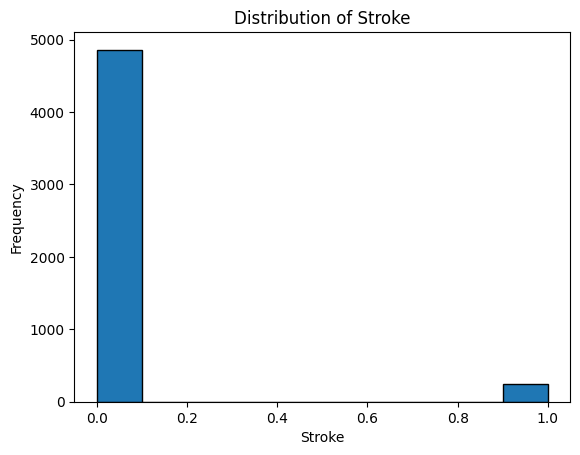

In [26]:
# plot a histogram of stroke distribution

plt.hist(df['stroke'], edgecolor='black')
plt.xlabel('Stroke')
plt.ylabel('Frequency')
plt.title('Distribution of Stroke')

plt.show();

Di sini kita dapat melihat bahwa variabel target 'stroke' sangat tidak seimbang (imbalanced). Hal ini akan kita tangani nanti menggunakan pustaka SMOTE, yang akan melakukan resampling pada data 'stroke' agar distribusinya menjadi lebih seimbang.

## Missing Values

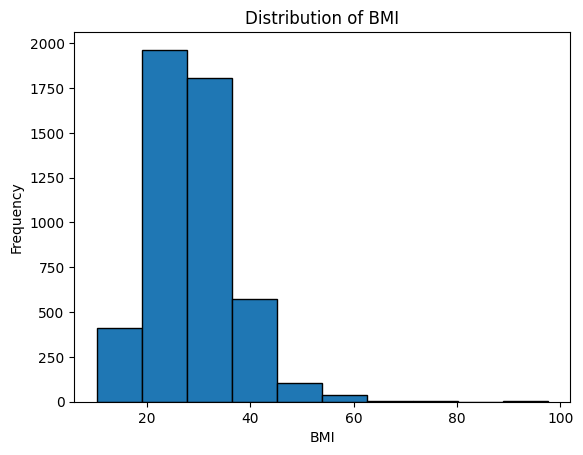

In [27]:
# plot a histogram of BMI value distribution

plt.hist(df['bmi'], edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.show()

In [28]:
# group the bmi median by 'gender', 'ever married', 'work type', and residence type'
bmi_groupby = mode_bmi = pd.DataFrame(df.groupby(['gender', 'ever_married', 'work_type', 'Residence_type'])
                                      ['bmi'].median())

In [29]:
# print the median groupby dataframe
bmi_groupby

bmi
gender ever_married work_type     Residence_type       
Female No           Govt_job      Rural           26.60
                                  Urban           27.10
                    Never_worked  Rural           25.75
                                  Urban           22.90
                    Private       Rural           26.90
                                  Urban           26.15
                    Self-employed Rural           27.95
                                  Urban           29.80
                    children      Rural           18.80
                                  Urban           19.10
       Yes          Govt_job      Rural           28.40
                                  Urban           29.70
                    Private       Rural           29.35
                                  Urban           29.55
                    Self-employed Rural           29.40
                                  Urban           28.70
Male   No           Govt_job      Rural           30.00
                                  Urban           29.00
                    Never_worked  Rural           28.40
                                  Urban           21.05
                    Private       Rural           27.30
                                  Urban           26.80
                    Self-employed Rural           29.45
                                  Urban           30.90
                    children      Rural           18.95
                                  Urban           18.80
       Yes          Govt_job      Rural           29.30
                                  Urban           30.60
                    Private       Rural           30.10
                                  Urban           30.10
                    Self-employed Rural           30.70
                                  Urban           29.30
Other  No           Private       Rural           22.40

In [30]:
median_bmi = df.groupby(['gender', 'ever_married', 'work_type', 'Residence_type'])
df['bmi'] = median_bmi['bmi'].transform(lambda x: x.fillna(x.median()))

In [31]:
# check for null values in the bmi column
df['bmi'].isnull().sum()

np.int64(0)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   float64
 3   heart_disease      5110 non-null   float64
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   float64
dtypes: float64(6), object(5)
memory usage: 439.3+ KB


## Outliers

### Age

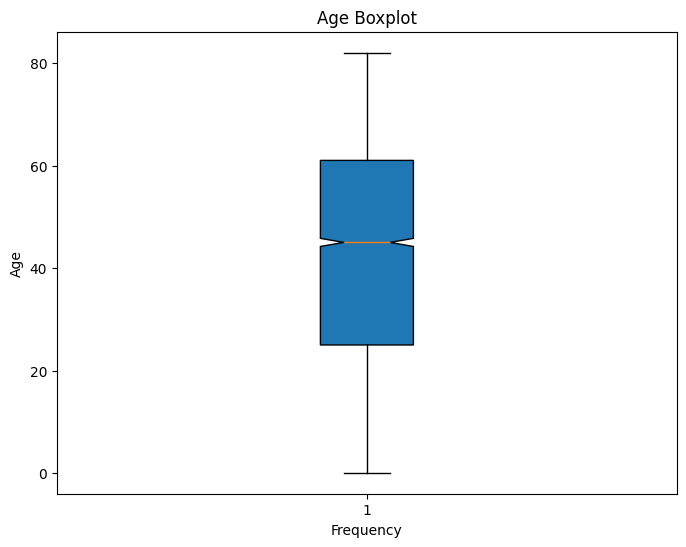

In [33]:
# box plot of the 'age' feature

plt.figure(figsize=(8, 6))
plt.boxplot(df['age'], patch_artist=True, notch=True);
plt.title('Age Boxplot')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.show()

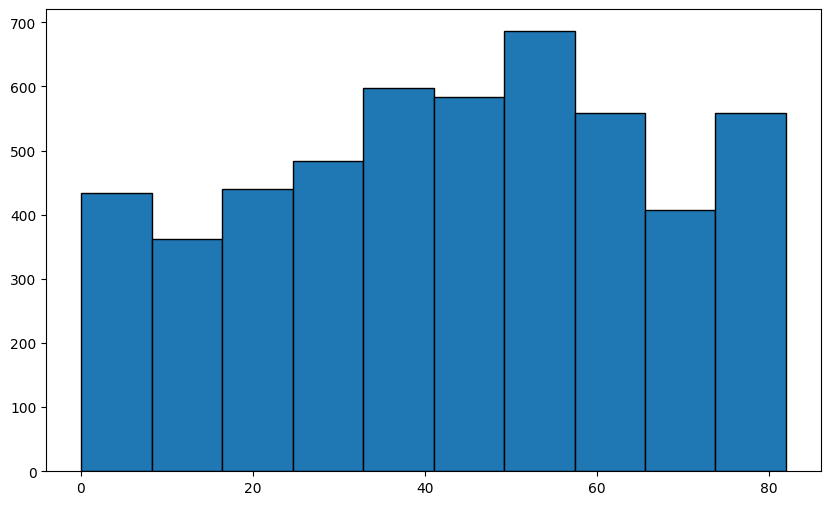

In [34]:
# histogram of Age

plt.figure(figsize=(10, 6))
plt.hist(df['age'], edgecolor='black')
plt.show()

Tidak ada outlier pada kolom 'Age'

### Hypertension

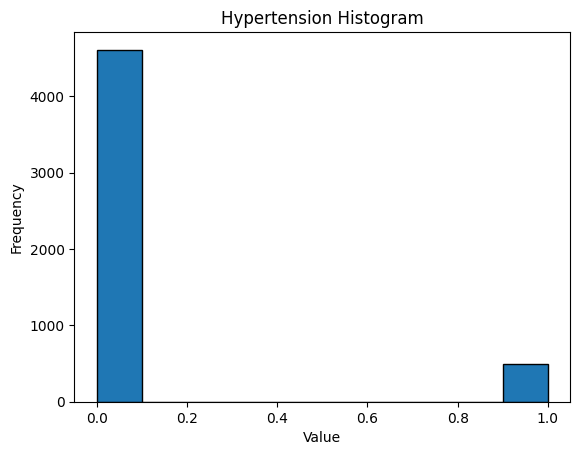

In [35]:
# histogram of Hypertension

plt.hist(df['hypertension'], edgecolor='black')

plt.title('Hypertension Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

Jumlah orang yang menderita hipertensi tidak terlalu banyak

### Heart Disease

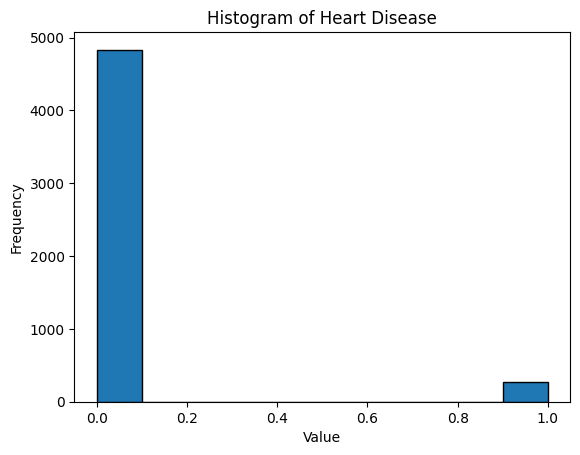

In [36]:
# histogram of Heart Disease
plt.hist(df['heart_disease'], edgecolor='black')
plt.title('Histogram of Heart Disease')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Distribusi pada histogram hipertensi dan penyakit jantung sangat mirip, bahkan hampir identik

### Average Glucose Level

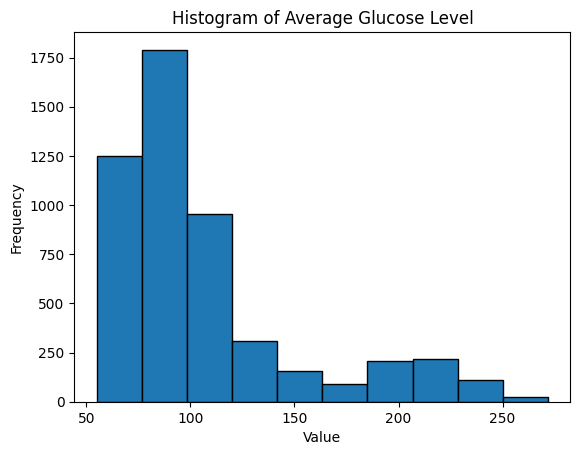

In [37]:
# histogram of Average Glucose Level
plt.hist(df['avg_glucose_level'], edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Average Glucose Level')
plt.show()

#### Interpretasi Kadar Glukosa Darah

Kadar glukosa mengacu pada jumlah gula (glukosa) yang terdapat dalam aliran darah. Berikut adalah rentang umum untuk interpretasi kadar glukosa darah:

### 1. Glukosa Darah Puasa (Fasting Blood Glucose)
- **Normal:** 70–99 mg/dL  
- **Pradiabetes:** 100–125 mg/dL  
- **Diabetes:** ≥126 mg/dL

### 2. Glukosa Darah Setelah Makan (Postprandial)
- **Normal:** <140 mg/dL  
- **Pradiabetes:** 140–199 mg/dL  
- **Diabetes:** ≥200 mg/dL

Rentang-rentang ini digunakan sebagai acuan dalam mendiagnosis kondisi glukosa darah serta memantau pengendalian gula darah, khususnya bagi individu dengan risiko atau riwayat diabetes.

> **Catatan:**  
> Berdasarkan distribusi nilai pada histogram, diasumsikan bahwa data kadar glukosa yang digunakan merupakan hasil pengukuran setelah makan (postprandial). Selain itu, tidak ditemukan nilai ekstrem (outlier) yang perlu dihilangkan dalam analisis ini.



### BMI

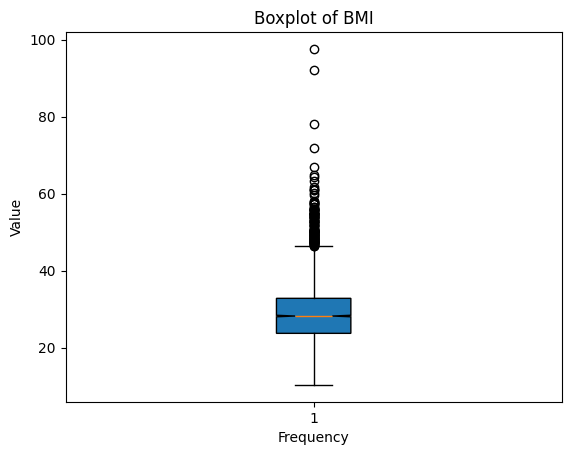

In [38]:
# boxplot of BMI
plt.boxplot(df['bmi'], patch_artist=True, notch=True)
plt.title('Boxplot of BMI')
plt.xlabel('Frequency')
plt.ylabel('Value')
plt.show()

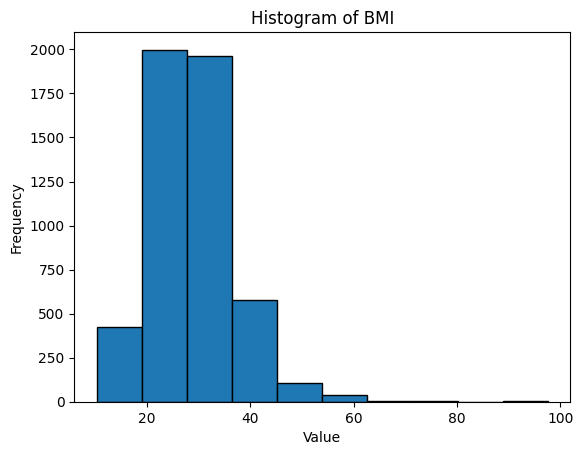

In [39]:
# histogram of BMI
plt.hist(df['bmi'], edgecolor='black')
plt.title('Histogram of BMI')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#### Kategori Indeks Massa Tubuh (IMT) Menurut WHO

**Indeks Massa Tubuh (IMT)** atau **Body Mass Index (BMI)** adalah indikator yang digunakan untuk memperkirakan jumlah lemak tubuh berdasarkan tinggi dan berat badan seseorang. IMT sering digunakan dalam dunia medis dan kesehatan masyarakat untuk mengidentifikasi status gizi dan risiko kesehatan terkait berat badan.

### Kategori IMT Berdasarkan WHO

Organisasi Kesehatan Dunia (WHO) mengklasifikasikan IMT ke dalam beberapa kategori berikut:

| Kategori                                 | Rentang IMT (kg/m²)   |
|------------------------------------------|------------------------|
| **Kurus (Underweight)**                  | IMT < 18,5             |
| **Berat badan normal (Normal weight)**   | 18,5 – 24,9            |
| **Kelebihan berat badan (Overweight)**   | 25 – 29,9              |
| **Obesitas Kelas I (Obesity Class I)**   | 30 – 34,9              |
| **Obesitas Kelas II (Obesity Class II)** | 35 – 39,9              |
| **Obesitas Kelas III (Severe/Morbid)**   | ≥ 40                   |



### Gender

In [40]:
# get the value counts of the gender column to see any outliers
df['gender'].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [41]:
# get index of rows where Gender is 'Other'
index_to_drop = df[df['gender'] == 'Other'].index
# drop the row that has the 'other' listed as gender
df = df.drop(index=index_to_drop)

# Exploratory Data Analysis

### Correlation Matrix

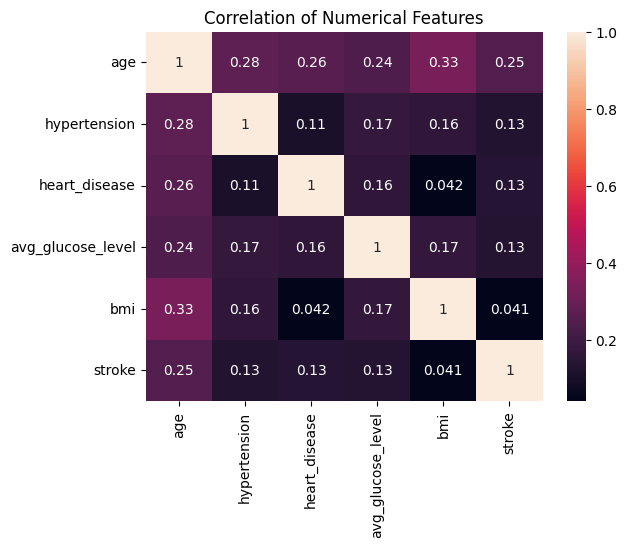

In [42]:
# calculate correlation matrix
correlation_matrix = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke']].corr()

# create a heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation of Numerical Features')
plt.show()

## Features and the Target Variable

### Box Plots

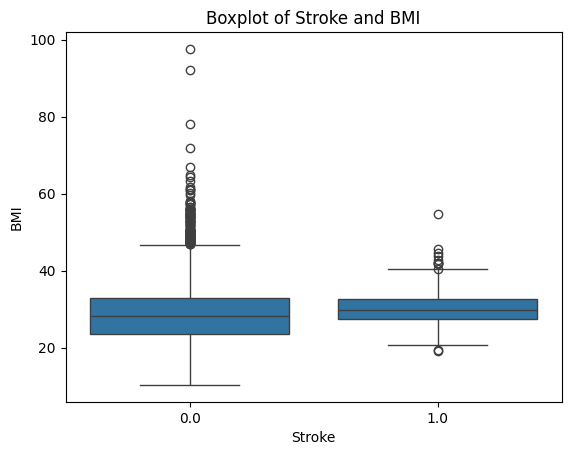

In [43]:
# create a boxplot of stroke and bmi
sns.boxplot(x=df['heart_disease'], y=df['bmi'], data=df)
plt.title('Boxplot of Stroke and BMI')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

Baik kelompok stroke maupun non-stroke memiliki distribusi BMI yang serupa, dengan sebagian besar data berpusat pada angka 25-30

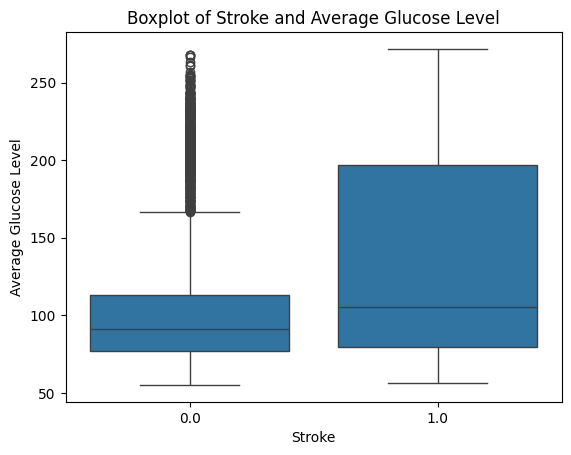

In [44]:
# create a Boxplot of stroke and bmi
sns.boxplot(x=df['stroke'], y=df['avg_glucose_level'], data=df)
plt.title('Boxplot of Stroke and Average Glucose Level')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.show()

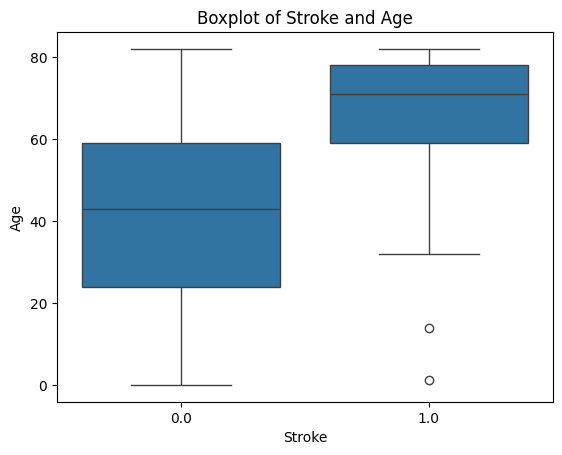

In [45]:
# create a Boxplot of stroke and bmi
sns.boxplot(x=df['stroke'], y=df['age'], data=df)
plt.title('Boxplot of Stroke and Age')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

Di sini kita bisa melihat tingginya angka stroke yang terjadi pada usia sekitar 80 tahun.

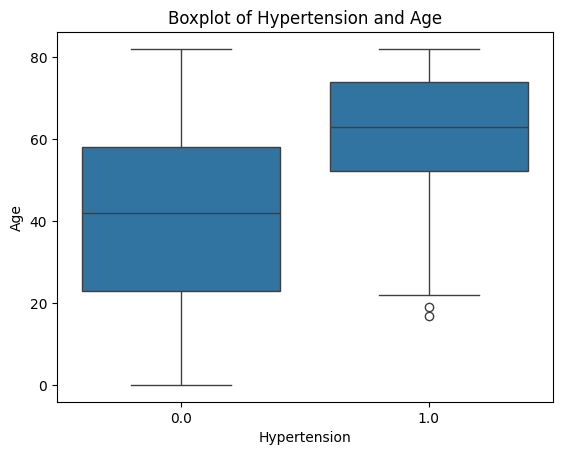

In [46]:
# create a boxplot of stroke and bmi
sns.boxplot(x=df['hypertension'], y=df['age'], data=df)
plt.title('Boxplot of Hypertension and Age')
plt.xlabel('Hypertension')
plt.ylabel('Age')
plt.show()

- Tanpa Hipertensi (0.0):
Kelompok ini menunjukkan distribusi usia yang lebih luas, dengan kepadatan tinggi pada rentang usia 30 hingga 60 tahun. Usia median (tengah) tampaknya berada di kisaran 40–45 tahun. Sebaran yang lebih lebar ini mengindikasikan bahwa individu tanpa hipertensi berasal dari berbagai kelompok usia, termasuk usia muda.

- Dengan Hipertensi (1.0):
Sebaliknya, kelompok ini memiliki distribusi usia yang lebih sempit, dengan sebagian besar individu berada pada rentang usia paruh baya hingga lanjut usia, yaitu sekitar 50–60 tahun. Grafik boxplot menunjukkan bahwa hipertensi lebih umum terjadi pada kelompok usia yang lebih tua, dan relatif jarang ditemukan pada individu yang lebih muda.


### Bar Charts

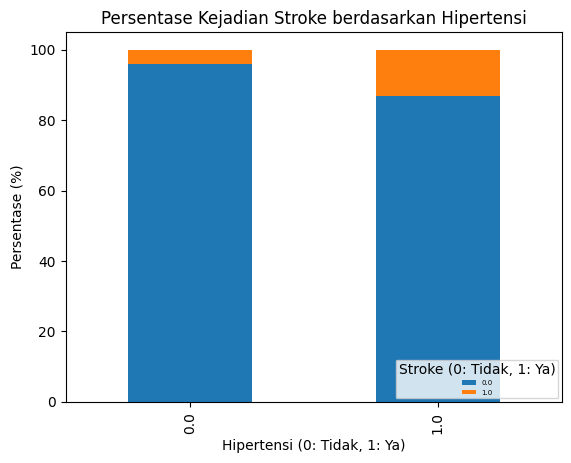

In [47]:
import matplotlib.pyplot as plt

# Hitung jumlah per kombinasi hypertension dan stroke
stroke_hypertension_counts = df.groupby(['hypertension', 'stroke']).size().unstack()

# Hitung persentase per baris (per kelompok hypertension)
stroke_hypertension_percent = stroke_hypertension_counts.div(stroke_hypertension_counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart dengan nilai persentase
stroke_hypertension_percent.plot(kind='bar', stacked=True)

plt.title('Persentase Kejadian Stroke berdasarkan Hipertensi')
plt.xlabel('Hipertensi (0: Tidak, 1: Ya)')
plt.ylabel('Persentase (%)')
plt.legend(title='Stroke (0: Tidak, 1: Ya)', loc='lower right', fontsize=5)

plt.show()


- Tanpa Hipertensi (0.0):
Mayoritas individu termasuk dalam kategori ini, dengan jumlah yang sangat tinggi pada mereka yang tidak mengalami stroke. Hanya sebagian kecil dari kelompok ini yang tercatat pernah mengalami stroke, menunjukkan bahwa risiko stroke pada individu tanpa hipertensi cenderung rendah.

- Dengan Hipertensi (1.0):
Jumlah individu dalam kelompok ini jauh lebih sedikit dibandingkan kelompok tanpa hipertensi. Namun, di antara individu yang memiliki hipertensi, proporsi yang mengalami stroke jauh lebih besar. Hal ini terlihat dari bagian oranye yang lebih besar pada grafik batang, yang merepresentasikan kasus stroke.

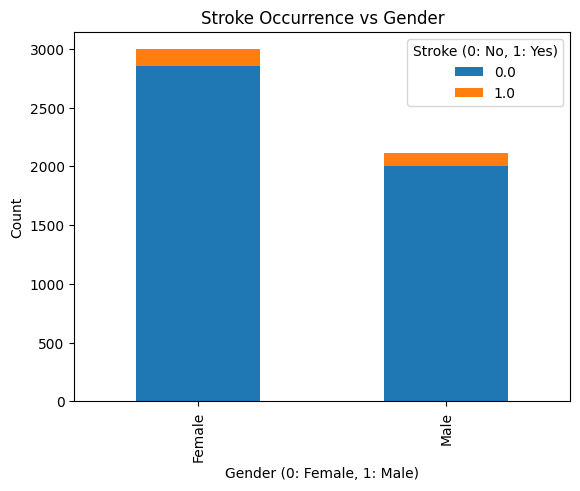

In [ ]:
# count occurrences for stroke and gender
stroke_gender_counts = df.groupby(['gender', 'stroke']).size().unstack()


# create the stacked bar chart
stroke_gender_counts.plot(kind='bar', stacked=True)
# add labels and title
plt.title('Stroke Occurrence vs Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Stroke (0: No, 1: Yes)', loc='upper right')
plt.show()

In [ ]:
stroke_gender_counts.value_counts()

,,count
0.0,1.0,
2007,108,1
2853,141,1


- Perempuan (0):
Jumlah perempuan dalam dataset ini lebih banyak dibandingkan laki-laki. Mayoritas perempuan tidak mengalami stroke, yang ditunjukkan oleh bagian biru yang besar pada grafik batang. Sementara itu, bagian oranye yang tipis di atasnya menunjukkan bahwa hanya sebagian kecil perempuan yang mengalami stroke.

- Laki-laki (1):
Jumlah laki-laki sedikit lebih rendah dibandingkan perempuan, namun pola distribusinya serupa. Terdapat bagian biru yang dominan menandakan banyak laki-laki tidak mengalami stroke, dan bagian oranye yang tipis menunjukkan proporsi stroke yang relatif kecil di kelompok ini.


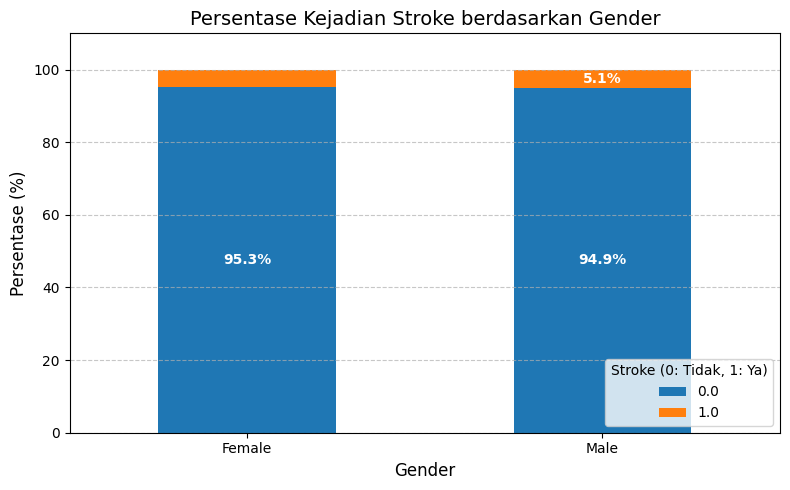

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah per kombinasi gender dan stroke
stroke_gender_counts = df.groupby(['gender', 'stroke']).size().unstack()

# Hitung persentase per baris (per gender)
stroke_gender_percent = stroke_gender_counts.div(stroke_gender_counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart dengan nilai persentase
ax = stroke_gender_percent.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(8, 5))

# Tambahkan elemen visual
plt.title('Persentase Kejadian Stroke berdasarkan Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Stroke (0: Tidak, 1: Ya)', loc='lower right')

# Tambahkan label persentase pada batang
for p in ax.patches:
    height = p.get_height()
    if height > 5:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                    ha='center', va='center',
                    color='white', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

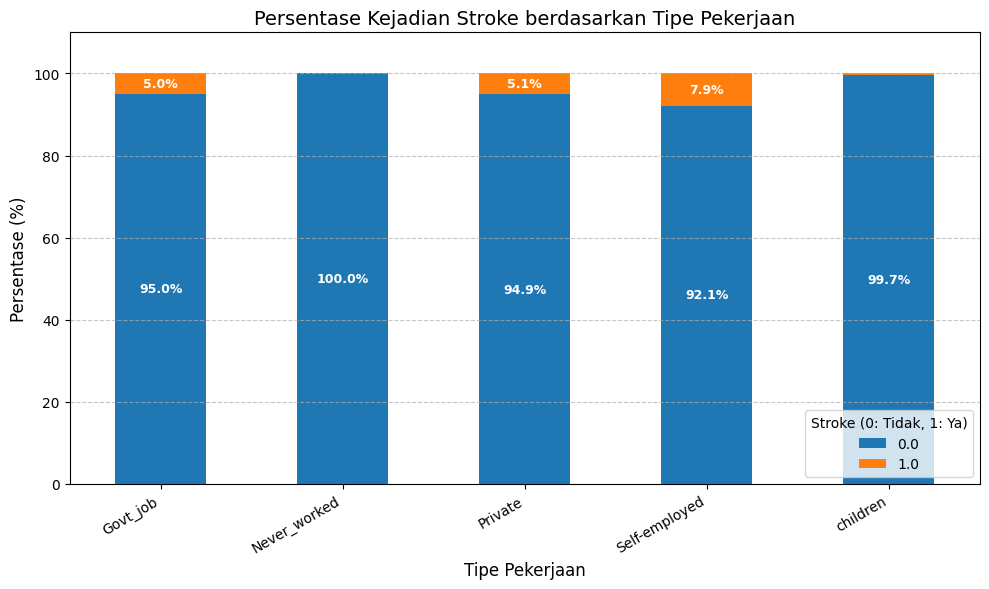

In [51]:
import matplotlib.pyplot as plt

# Hitung jumlah per kombinasi work_type dan stroke
stroke_worktype_counts = df.groupby(['work_type', 'stroke']).size().unstack()

# Hitung persentase per baris (per work_type)
stroke_worktype_percent = stroke_worktype_counts.div(stroke_worktype_counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart dengan nilai persentase
ax = stroke_worktype_percent.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(10, 6))

# Tambahkan elemen visual
plt.title('Persentase Kejadian Stroke berdasarkan Tipe Pekerjaan', fontsize=14)
plt.xlabel('Tipe Pekerjaan', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)
plt.xticks(rotation=30, ha='right')  # untuk menjaga label tidak tumpang tindih
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Stroke (0: Tidak, 1: Ya)', loc='lower right')

# Tambahkan label persentase pada batang
for p in ax.patches:
    height = p.get_height()
    if height > 5:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                    ha='center', va='center',
                    color='white', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


<ipython-input-57-e6a7ede7f1a5>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_group = df.groupby(['kelompok_usia', 'work_type']).size()
<ipython-input-57-e6a7ede7f1a5>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_per_group = stroke_data.groupby(['kelompok_usia', 'work_type']).size()


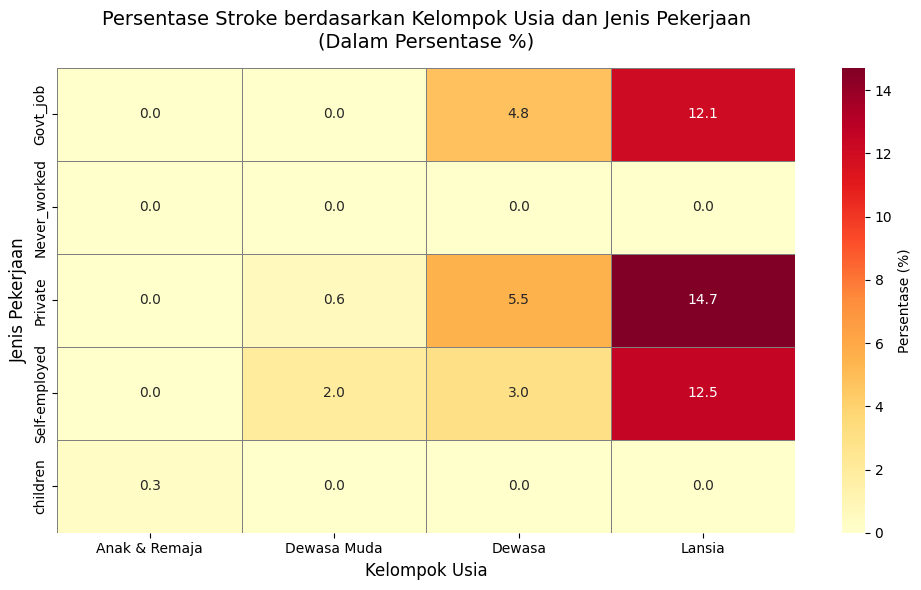

In [57]:
def kategorikan_usia(age):
    if age <= 18:
        return 'Anak & Remaja'
    elif age <= 45:
        return 'Dewasa Muda'
    elif age <= 60:
        return 'Dewasa'
    else:
        return 'Lansia'

df['kelompok_usia'] = df['age'].apply(kategorikan_usia)

usia_order = ['Anak & Remaja', 'Dewasa Muda', 'Dewasa', 'Lansia']
df['kelompok_usia'] = pd.Categorical(df['kelompok_usia'], categories=usia_order, ordered=True)

stroke_data = df[df['stroke'] == 1]
total_per_group = df.groupby(['kelompok_usia', 'work_type']).size()
stroke_per_group = stroke_data.groupby(['kelompok_usia', 'work_type']).size()
percentage = (stroke_per_group / total_per_group * 100).unstack()

percentage_filled = percentage.fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(
    percentage_filled.T,  # transpose agar work_type di sumbu Y
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    cbar_kws={'label': 'Persentase (%)'},
    linewidths=0.5,
    linecolor='gray'
)

plt.title("Persentase Stroke berdasarkan Kelompok Usia dan Jenis Pekerjaan\n(Dalam Persentase %)", fontsize=14, pad=15)
plt.xlabel("Kelompok Usia", fontsize=12)
plt.ylabel("Jenis Pekerjaan", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

## Correlation of Features

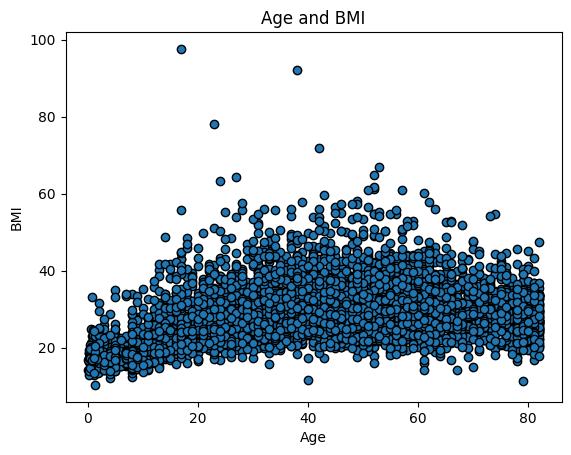

In [ ]:
# scatterplot of age and bmi

plt.scatter(df['age'], df['bmi'], edgecolor='black')

plt.title('Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')

plt.show()

Tidak terlihat adanya peningkatan atau penurunan yang signifikan pada nilai IMT seiring bertambahnya usia. Meskipun begitu, pada kelompok usia yang lebih tua, khususnya usia 30 tahun ke atas, terdapat variasi nilai IMT yang lebih besar, yang ditunjukkan oleh penyebaran data yang lebih lebar.

Secara keseluruhan, tidak ditemukan pola yang jelas yang menunjukkan hubungan langsung antara usia dan IMT. Hal ini mengindikasikan bahwa meskipun usia mungkin memiliki sedikit pengaruh terhadap IMT, faktor-faktor lain seperti pola makan, aktivitas fisik, kondisi medis, dan gaya hidup kemungkinan memiliki peran yang lebih besar dalam menentukan nilai IMT seseorang.

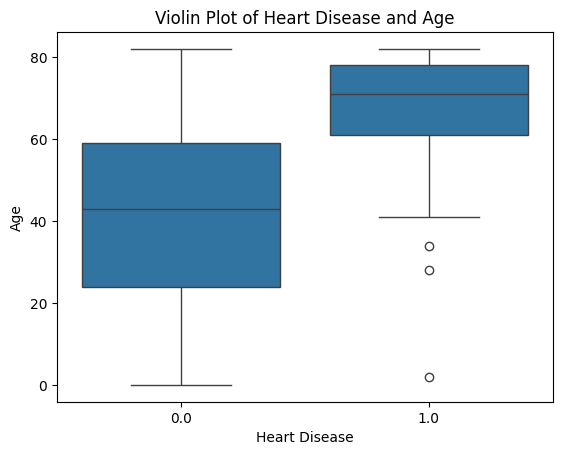

In [ ]:
# create a violin plot of age and heart disease

sns.boxplot(x=df['heart_disease'], y=df['age'], data=df)

plt.title('Violin Plot of Heart Disease and Age')
plt.xlabel('Heart Disease')
plt.ylabel('Age')

plt.show()

- Tanpa Penyakit Jantung(0):
Kelompok ini menunjukkan sebaran usia yang lebih luas, dengan plot yang tampak simetris. Hal ini mengindikasikan bahwa individu tanpa penyakit jantung tersebar merata di berbagai rentang usia, mulai dari muda hingga tua.

- Dengan Penyakit Jantung(1):
Sebaliknya, distribusi usia pada individu dengan penyakit jantung terlihat lebih terkonsentrasi, terutama pada rentang usia 60 hingga 85 tahun. Hal ini menunjukkan bahwa mayoritas penderita penyakit jantung berada pada usia lanjut.

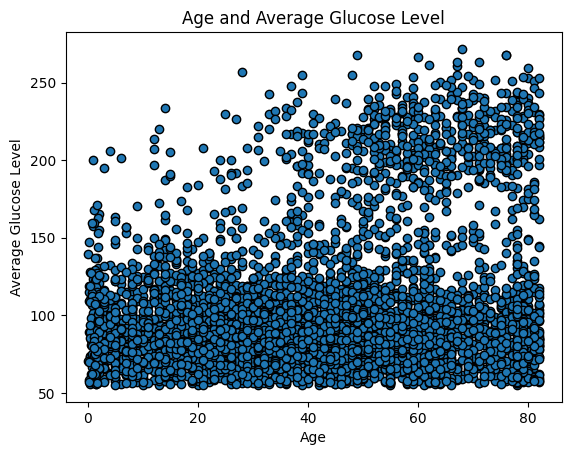

In [ ]:
# scatterplot of age and average glucose level
plt.scatter(df['age'], df['avg_glucose_level'], edgecolor='black')
plt.title('Age and Average Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()

Sebagian besar nilai kadar glukosa terkonsentrasi pada rentang 50 hingga 150, dan pola ini berlaku untuk semua kelompok usia.

Secara sekilas, tidak terlihat adanya korelasi yang kuat antara usia dan kadar glukosa. Namun, terdapat lebih banyak kasus dengan kadar glukosa tinggi (di atas 150) pada individu berusia di atas 40 tahun. Meskipun demikian, kasus-kasus ini tetap tersebar secara relatif dan tidak membentuk pola tren yang jelas.

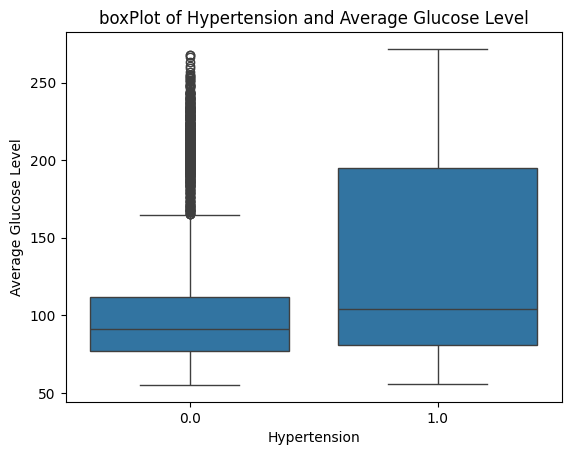

In [ ]:
# create a vboxplot plot of average glucose level and hypertension

sns.boxplot(x=df['hypertension'], y=df['avg_glucose_level'], data=df)

plt.title('boxPlot of Hypertension and Average Glucose Level')
plt.xlabel('Hypertension')
plt.ylabel('Average Glucose Level')

plt.show()

- Tanpa Hipertensi(0):
Mayoritas individu tanpa hipertensi memiliki rata-rata kadar glukosa yang terkonsentrasi di sekitar angka 90. Distribusinya relatif rapat dan konsisten, dengan hanya sedikit nilai yang menyimpang ke kadar glukosa yang lebih tinggi (outlier).

- Dengan Hipertensi(1):
Sebaliknya, individu dengan hipertensi menunjukkan distribusi kadar glukosa yang lebih menyebar. Meskipun mereka juga memiliki kepadatan data di sekitar angka 90, terdapat peningkatan kepadatan yang signifikan di sekitar angka 225.

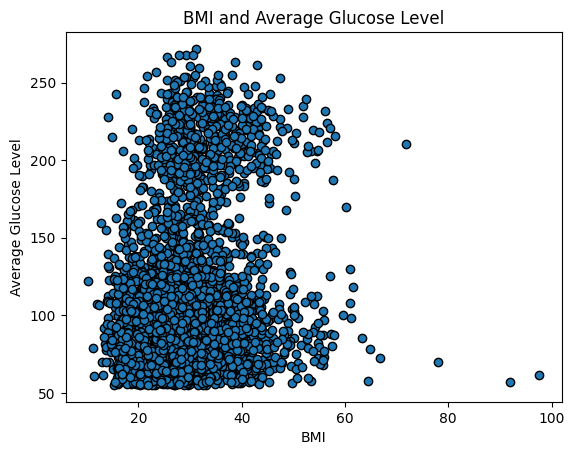

In [ ]:
# scatterplot of bmi and average glucose level
plt.scatter(df['bmi'], df['avg_glucose_level'], edgecolor='black')
plt.title('BMI and Average Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.show()

Sebagian besar data terkonsentrasi pada nilai BMI antara 20 hingga 35, dengan rata-rata kadar glukosa berada di rentang 50 hingga 150. Ini menunjukkan bahwa sebagian besar individu memiliki IMT dalam kategori normal hingga overweight, dan kadar glukosa yang masih dalam kisaran umum.

Tidak terlihat adanya korelasi linear yang kuat antara BMI dan kadar glukosa. Meskipun nilai BMI dan kadar glukosa bervariasi, tidak ada pola yang jelas yang menunjukkan bahwa peningkatan BMI secara langsung berkaitan dengan peningkatan kadar glukosa.

## Uji Chi-Square


In [ ]:
# gender vs stroke
table_gender = pd.crosstab(df['gender'], df['stroke'])
chi2_gender, p_gender, dof_gender, _ = chi2_contingency(table_gender)
print(f"gender - Chi2: {chi2_gender:.2f}, p-value: {p_gender}")

gender - Chi2: 0.34, p-value: 0.5598277580669416


In [ ]:
# hypertension vs stroke
table_hyper = pd.crosstab(df['hypertension'], df['stroke'])
chi2_hyper, p_hyper, dof_hyper, _ = chi2_contingency(table_hyper)
print(f"hypertension - Chi2: {chi2_hyper:.2f}, p-value: {p_hyper}")

hypertension - Chi2: 81.57, p-value: 1.688936253410575e-19


In [ ]:
# heart_disease vs stroke
table_hd = pd.crosstab(df['heart_disease'], df['stroke'])
chi2_hd, p_hd, dof_hd, _ = chi2_contingency(table_hd)
print(f"heart_disease - Chi2: {chi2_hd:.2f}, p-value: {p_hd}")


heart_disease - Chi2: 90.23, p-value: 2.120831133146208e-21


In [ ]:
# ever_married vs stroke

table_married = pd.crosstab(df['ever_married'], df['stroke'])
chi2_married, p_married, dof_married, _ = chi2_contingency(table_married)
print(f"ever_married - Chi2: {chi2_married:.2f}, p-value: {p_married}")

ever_married - Chi2: 58.87, p-value: 1.6862856191673454e-14


In [ ]:
# work_type vs stroke
table_work = pd.crosstab(df['work_type'], df['stroke'])
chi2_work, p_work, dof_work, _ = chi2_contingency(table_work)
print(f"work_type - Chi2: {chi2_work:.2f}, p-value: {p_work}")


work_type - Chi2: 49.16, p-value: 5.40903546949726e-10


In [ ]:
# Residence_type vs stroke
table_res = pd.crosstab(df['Residence_type'], df['stroke'])
chi2_res, p_res, dof_res, _ = chi2_contingency(table_res)
print(f"Residence_type - Chi2: {chi2_res:.2f}, p-value: {p_res}")


Residence_type - Chi2: 1.07, p-value: 0.29982523877153633


In [ ]:
df.head().T

,0,1,2,3,4
gender,Male,Female,Male,Female,Female
age,67.0,61.0,80.0,49.0,79.0
hypertension,0.0,0.0,0.0,0.0,1.0
heart_disease,1.0,0.0,1.0,0.0,0.0
ever_married,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed
Residence_type,Urban,Rural,Rural,Urban,Rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,29.4,32.5,34.4,24.0
smoking_status,formerly smoked,never smoked,never smoked,smokes,never smoked


In [ ]:
# clean the column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[^a-z0-9]', '_')
    .str.replace(r'__+', '_')
    .str.replace('-', '_')
    .str.replace(' ', '_')
)

In [ ]:
# check the dataframe
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0
1,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,29.4,never smoked,1.0
2,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1.0
3,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1.0
4,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1.0


## Categorical Variables

In [ ]:
df.head().T

,0,1,2,3,4
gender,Male,Female,Male,Female,Female
age,67.0,61.0,80.0,49.0,79.0
hypertension,0.0,0.0,0.0,0.0,1.0
heart_disease,1.0,0.0,1.0,0.0,0.0
ever_married,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed
residence_type,Urban,Rural,Rural,Urban,Rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,29.4,32.5,34.4,24.0
smoking_status,formerly smoked,never smoked,never smoked,smokes,never smoked


In [ ]:
# select the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True).astype(int)

# Scaling, Train, Test, Split

In [ ]:
X = df.drop(columns=['stroke'], axis=1)
y = df['stroke']

In [ ]:
# split the data, since the dataset is unbalanced, pass stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()

In [ ]:
# fit the scaler on the training data, then transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### SMOTE

In [ ]:
# initialize SMOTE
smote = SMOTE(random_state=42)

In [ ]:
# apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
# check the new class distribution
print("Resampled class distribution:", pd.Series(y_train_smote).value_counts())

Resampled class distribution: stroke
0    3888
1    3888
Name: count, dtype: int64


In [ ]:
X_train_smote.shape

(7776, 15)

In [ ]:
y_train_smote.shape

(7776,)

In [ ]:
X_test_scaled.shape

(1022, 15)

In [ ]:
# apply SMOTE to un scaled dataframe for Random Forest Classifier
X_train_smote_unscaled, y_train_smote_unscaled = smote.fit_resample(X_train, y_train)

In [ ]:
X_train_smote_unscaled.head().T

,0,1,2,3,4
age,48,29,35,38,14
hypertension,0,0,0,0,0
heart_disease,0,0,0,0,0
avg_glucose_level,69,84,119,108,82
bmi,33,21,22,32,31
gender_Male,0,0,0,1,1
ever_married_Yes,1,0,1,1,0
work_type_Never_worked,0,0,0,0,0
work_type_Private,1,1,1,1,0
work_type_Self-employed,0,0,0,0,0


In [ ]:
X_train_df = pd.DataFrame(X_train_smote, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

X_train_df.reset_index(drop=True, inplace=True)
y_train_smote.reset_index(drop=True, inplace=True)
X_test_df.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# add target column back
X_train_df['stroke'] = y_train_smote.values
X_test_df['stroke'] = y_test.values

# combine scaled and target-appended training and test data
combined_SMOTE_df = pd.concat([X_train_df, X_test_df], ignore_index=True)

# Model Selection

## Evalution Function

In [ ]:
# create a function for evaluation that prints a confusion matrix, classification report, and auc scores

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_train_scores = model.predict_proba(X_train)[:, 1]
    y_pred = model.predict(X_test)
    y_test_scores = model.predict_proba(X_test)[:, 1]

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("AUC_score_test", round(roc_auc_score(y_test, y_test_scores),2))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("AUC_score_test", round(roc_auc_score(y_train, y_train_scores),2))

In [ ]:
def metric_df(model, X_train, y_train, X_test, y_test,name):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    scores = {name: {"accuracy" : accuracy_score(y_test,y_pred),
    "precision" : precision_score(y_test, y_pred),
    "recall" : recall_score(y_test, y_pred),
    "f1" : f1_score(y_test,y_pred),
     "True Negative Rate": confusion_matrix(y_test,y_pred)[0][0]/confusion_matrix(y_test,y_pred).sum(),
     "False Positive Rate": confusion_matrix(y_test,y_pred)[0][1]/confusion_matrix(y_test,y_pred).sum(),
    "False Negative Rate": confusion_matrix(y_test,y_pred)[1][0]/confusion_matrix(y_test,y_pred).sum(),
    "True Positive Rate": confusion_matrix(y_test,y_pred)[1][1]/confusion_matrix(y_test,y_pred).sum()}}
    return pd.DataFrame(scores)

## Logistic Regression

In [ ]:
# create instance of a Logistic Regression
log = LogisticRegression(max_iter=1000, class_weight='balanced') # assign class weight = balanced since the dataset is unbalance

In [ ]:
log.fit(X_train_scaled, y_train);

In [ ]:
feature_importance_log = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(log.coef_[0])
}).sort_values(by='Importance', ascending=False)

In [ ]:
y_pred = log.predict(X_test_scaled)

In [ ]:
y_pred_prob = log.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# evaluation metrics
eval_metric(log, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[716 256]
 [ 10  40]]
              precision    recall  f1-score   support

           0       0.99      0.74      0.84       972
           1       0.14      0.80      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.74      0.81      1022

AUC_score_test 0.84

Train_Set
[[2863 1025]
 [  36  163]]
              precision    recall  f1-score   support

           0       0.99      0.74      0.84      3888
           1       0.14      0.82      0.24       199

    accuracy                           0.74      4087
   macro avg       0.56      0.78      0.54      4087
weighted avg       0.95      0.74      0.81      4087

AUC_score_test 0.85


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

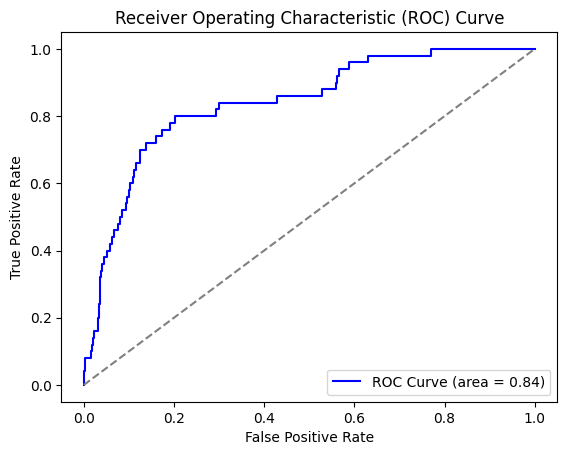

In [ ]:
# plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
feature_importance_log

,Feature,Importance
0,age,1.891873
10,work_type_children,0.344725
3,avg_glucose_level,0.209935
1,hypertension,0.185025
7,work_type_Never_worked,0.184822
13,smoking_status_never smoked,0.110014
14,smoking_status_smokes,0.106442
11,residence_type_Urban,0.087310
6,ever_married_Yes,0.080151
9,work_type_Self-employed,0.076638


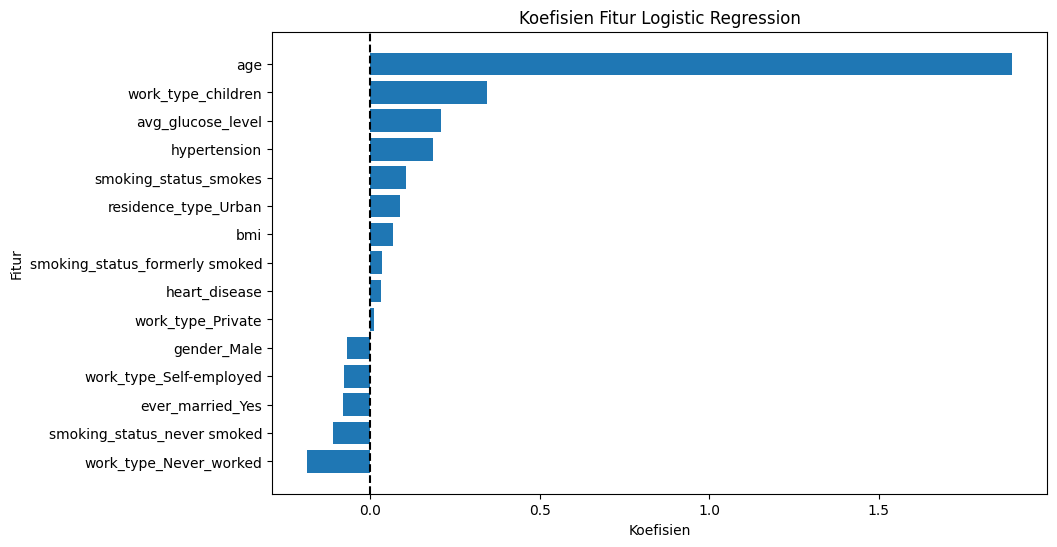

In [ ]:
coefs = log.coef_[0]  # ambil koefisien
features = X_train.columns

# Buat DataFrame
coef_df = pd.DataFrame({'feature': features, 'coefficient': coefs})
coef_df.sort_values(by='coefficient', inplace=True)

# Plot dengan arah
plt.figure(figsize=(10,6))
plt.barh(coef_df['feature'], coef_df['coefficient'])
plt.axvline(0, color='black', linestyle='--')
plt.title("Koefisien Fitur Logistic Regression")
plt.xlabel("Koefisien")
plt.ylabel("Fitur")
plt.show()


In [ ]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log.coef_[0]
})

# Urutkan berdasarkan nilai koefisien
coef_df_sorted = coef_df.sort_values(by='Coefficient', ascending=False)

coef_df_sorted


,Feature,Coefficient
0,age,1.891873
10,work_type_children,0.344725
3,avg_glucose_level,0.209935
1,hypertension,0.185025
14,smoking_status_smokes,0.106442
11,residence_type_Urban,0.087310
4,bmi,0.069257
12,smoking_status_formerly smoked,0.036754
2,heart_disease,0.033691
8,work_type_Private,0.013203


### Logistic Regression with SMOTE

In [ ]:
log_smote = LogisticRegression(max_iter=1000)
log_smote.fit(X_train_smote, y_train_smote);
y_pred = log_smote.predict(X_test_scaled)
y_pred_prob = log.predict_proba(X_test_scaled)[:, 1]

# evaluation metrics
eval_metric(log_smote, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[715 257]
 [ 10  40]]
              precision    recall  f1-score   support

           0       0.99      0.74      0.84       972
           1       0.13      0.80      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.74      0.81      1022

AUC_score_test 0.84

Train_Set
[[2884 1004]
 [  38  161]]
              precision    recall  f1-score   support

           0       0.99      0.74      0.85      3888
           1       0.14      0.81      0.24       199

    accuracy                           0.75      4087
   macro avg       0.56      0.78      0.54      4087
weighted avg       0.95      0.75      0.82      4087

AUC_score_test 0.85


## Support Vector Machines

In [ ]:
# initalize the model
svm_model = SVC(kernel='linear', C=1.0, random_state=42, probability=True, class_weight='balanced')

In [ ]:
svm_model.fit(X_train_scaled, y_train);

In [ ]:
y_pred = svm_model.predict(X_test_scaled)

In [ ]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(svm_model.coef_[0])
}).sort_values(by='importance', ascending=False)

In [ ]:
y_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

In [ ]:
# evaluation
eval_metric(svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[696 276]
 [  9  41]]
              precision    recall  f1-score   support

           0       0.99      0.72      0.83       972
           1       0.13      0.82      0.22        50

    accuracy                           0.72      1022
   macro avg       0.56      0.77      0.53      1022
weighted avg       0.95      0.72      0.80      1022

AUC_score_test 0.84

Train_Set
[[2797 1091]
 [  33  166]]
              precision    recall  f1-score   support

           0       0.99      0.72      0.83      3888
           1       0.13      0.83      0.23       199

    accuracy                           0.72      4087
   macro avg       0.56      0.78      0.53      4087
weighted avg       0.95      0.72      0.80      4087

AUC_score_test 0.85


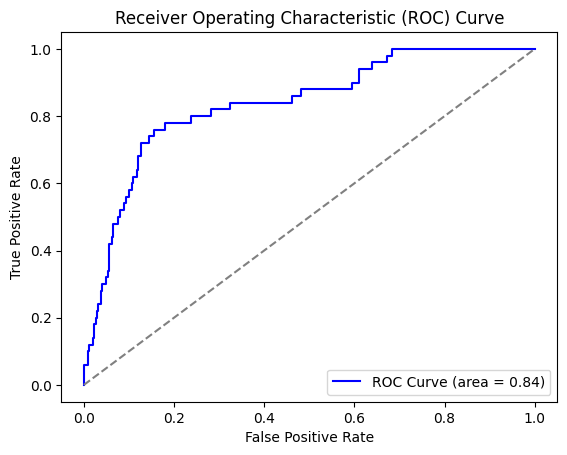

In [ ]:
# plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

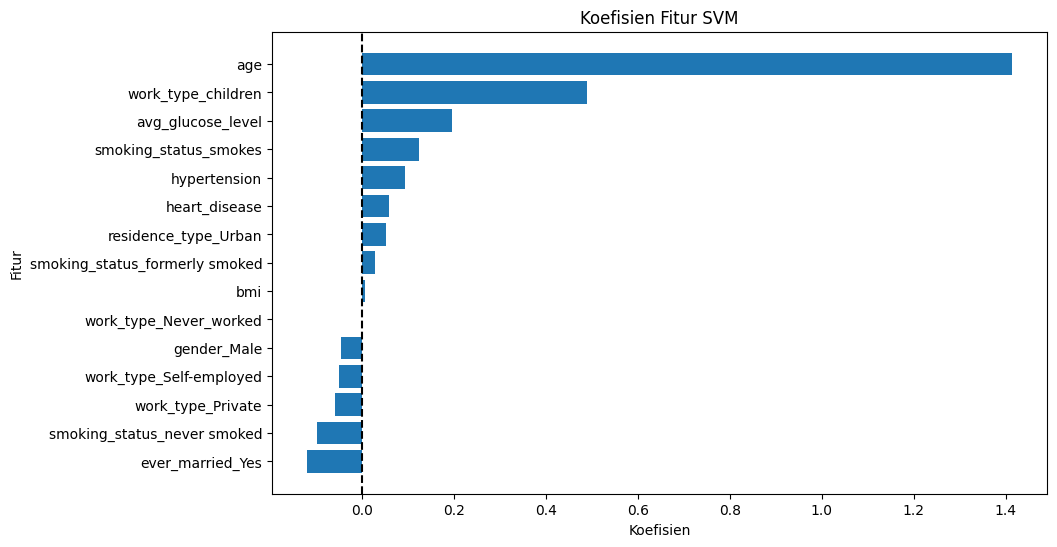

In [ ]:
coefs = svm_model.coef_[0]  # ambil koefisien
features = X_train.columns

# Buat DataFrame
coef_df = pd.DataFrame({'feature': features, 'coefficient': coefs})
coef_df.sort_values(by='coefficient', inplace=True)

# Plot dengan arah
plt.figure(figsize=(10,6))
plt.barh(coef_df['feature'], coef_df['coefficient'])
plt.axvline(0, color='black', linestyle='--')
plt.title("Koefisien Fitur SVM")
plt.xlabel("Koefisien")
plt.ylabel("Fitur")
plt.show()


In [ ]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': svm_model.coef_[0]
})

# Urutkan berdasarkan nilai koefisien
coef_df_sorted = coef_df.sort_values(by='Coefficient', ascending=False)

coef_df_sorted


,Feature,Coefficient
0,age,1.412874e+00
10,work_type_children,4.883354e-01
3,avg_glucose_level,1.951726e-01
14,smoking_status_smokes,1.242481e-01
1,hypertension,9.290901e-02
2,heart_disease,5.773171e-02
11,residence_type_Urban,5.248733e-02
12,smoking_status_formerly smoked,2.837873e-02
4,bmi,7.095458e-03
7,work_type_Never_worked,-5.946355e-13


### SVM with SMOTE

In [ ]:
svm_model_smote = SVC(kernel='linear', C=1.0, random_state=42, probability=True)
svm_model_smote.fit(X_train_smote, y_train_smote);

y_pred = svm_model_smote.predict(X_test_scaled)

In [ ]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(svm_model_smote.coef_[0])
}).sort_values(by='importance', ascending=False)

In [ ]:
y_pred_prob = svm_model_smote.predict_proba(X_test_scaled)[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

In [ ]:
# evaluation
eval_metric(svm_model_smote, X_train_smote, y_train_smote, X_test_scaled, y_test)

Test_Set
[[686 286]
 [  9  41]]
              precision    recall  f1-score   support

           0       0.99      0.71      0.82       972
           1       0.13      0.82      0.22        50

    accuracy                           0.71      1022
   macro avg       0.56      0.76      0.52      1022
weighted avg       0.94      0.71      0.79      1022

AUC_score_test 0.84

Train_Set
[[2787 1101]
 [ 462 3426]]
              precision    recall  f1-score   support

           0       0.86      0.72      0.78      3888
           1       0.76      0.88      0.81      3888

    accuracy                           0.80      7776
   macro avg       0.81      0.80      0.80      7776
weighted avg       0.81      0.80      0.80      7776

AUC_score_test 0.85


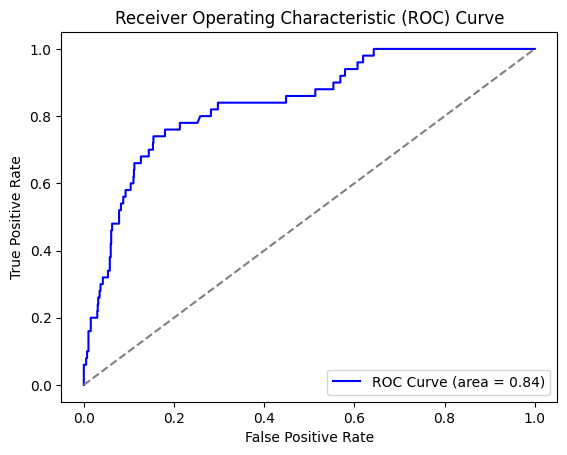

In [ ]:
# plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
feature_importance

,feature,importance
0,age,1.646428e+00
10,work_type_children,6.471934e-01
3,avg_glucose_level,1.623289e-01
13,smoking_status_never smoked,1.594089e-01
14,smoking_status_smokes,1.062533e-01
1,hypertension,9.608731e-02
5,gender_Male,7.764556e-02
11,residence_type_Urban,7.581587e-02
8,work_type_Private,6.064198e-02
6,ever_married_Yes,5.870228e-02


### SVM TUNE

In [ ]:
param_grid = {'C': [0.02, 0.04, 0.06],
              'gamma': [0.02, 0.04],
              'kernel': ['rbf','linear']}

svm_model_tune = SVC(class_weight='balanced', probability=True)
svm_model_tune_grid = GridSearchCV(svm_model_tune, param_grid, cv=5, n_jobs=-1)
svm_model_tune_grid.fit(X_train_scaled, y_train);

In [ ]:
svm_model_tune_grid.best_params_

{'C': 0.06, 'gamma': 0.02, 'kernel': 'linear'}

In [ ]:
svm_model_tune1 = SVC(C=0.06, gamma=0.02, kernel='linear')

In [ ]:
svm_model_tune1.fit(X_train_scaled, y_train);

In [ ]:
eval_metric(svm_model_tune_grid, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[693 279]
 [  9  41]]
              precision    recall  f1-score   support

           0       0.99      0.71      0.83       972
           1       0.13      0.82      0.22        50

    accuracy                           0.72      1022
   macro avg       0.56      0.77      0.52      1022
weighted avg       0.95      0.72      0.80      1022

AUC_score_test 0.84

Train_Set
[[2785 1103]
 [  33  166]]
              precision    recall  f1-score   support

           0       0.99      0.72      0.83      3888
           1       0.13      0.83      0.23       199

    accuracy                           0.72      4087
   macro avg       0.56      0.78      0.53      4087
weighted avg       0.95      0.72      0.80      4087

AUC_score_test 0.85


In [ ]:
# get coefficients from best estimator
coefficients = svm_model_tune_grid.best_estimator_.coef_.flatten()

Importance = np.abs(coefficients)

feature_importance_svm = pd.DataFrame({'Feature': X_train.columns, 'Importance': Importance})
feature_importance_svm = feature_importance.sort_values(by='importance', ascending=False)

feature_importance_svm

,feature,importance
0,age,1.646428e+00
10,work_type_children,6.471934e-01
3,avg_glucose_level,1.623289e-01
13,smoking_status_never smoked,1.594089e-01
14,smoking_status_smokes,1.062533e-01
1,hypertension,9.608731e-02
5,gender_Male,7.764556e-02
11,residence_type_Urban,7.581587e-02
8,work_type_Private,6.064198e-02
6,ever_married_Yes,5.870228e-02


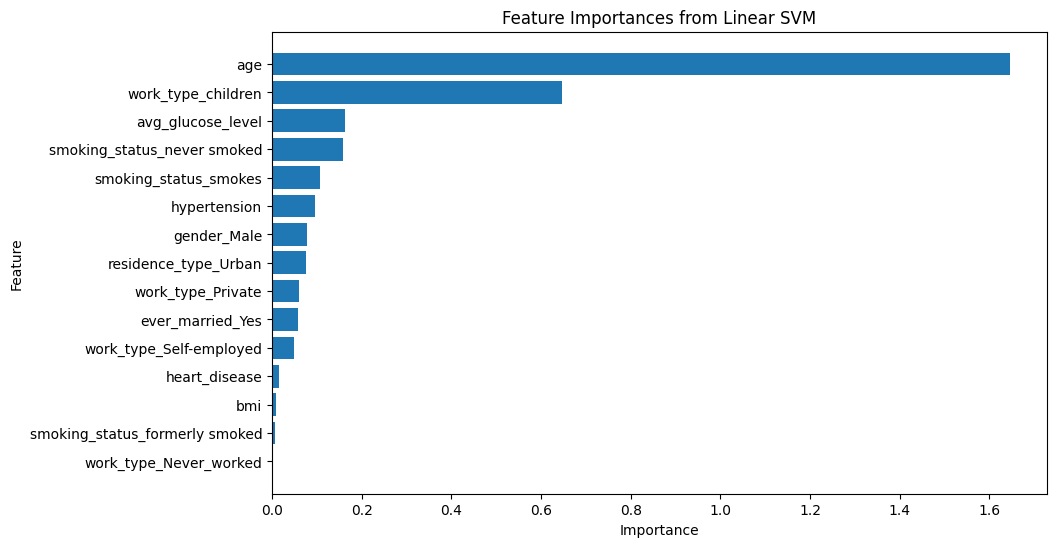

In [ ]:
# sort the features by importance
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances from Linear SVM")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

## Random Forest

In [ ]:
# initilize the model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

#  predictions
y_pred= rf_model.predict(X_test)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[922  50]
 [ 40  10]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       972
           1       0.17      0.20      0.18        50

    accuracy                           0.91      1022
   macro avg       0.56      0.57      0.57      1022
weighted avg       0.92      0.91      0.92      1022

AUC_score_test 0.78

Train_Set
[[3746  142]
 [   5  194]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3888
           1       0.58      0.97      0.73       199

    accuracy                           0.96      4087
   macro avg       0.79      0.97      0.85      4087
weighted avg       0.98      0.96      0.97      4087

AUC_score_test 0.99


The model is overfitting on the training set with a near perfect accuracy.

### Random Forest with SMOTE

In [ ]:
rf_model_smote = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model_smote.fit(X_train_smote_unscaled, y_train_smote_unscaled)

# predictions
y_pred = rf_model_smote.predict(X_test)

# evaluation
eval_metric(rf_model_smote, X_train, y_train, X_test, y_test)

Test_Set
[[886  86]
 [ 40  10]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       972
           1       0.10      0.20      0.14        50

    accuracy                           0.88      1022
   macro avg       0.53      0.56      0.54      1022
weighted avg       0.92      0.88      0.89      1022

AUC_score_test 0.76

Train_Set
[[3608  280]
 [  42  157]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      3888
           1       0.36      0.79      0.49       199

    accuracy                           0.92      4087
   macro avg       0.67      0.86      0.73      4087
weighted avg       0.96      0.92      0.93      4087

AUC_score_test 0.96


Random Forest jelas mengalami overfitting pada data train, dengan skor AUC sebesar 0.96 pada data pelatihan dan 0.77 pada data test.

### Random Forest TUNE

In [ ]:
rf_tune = RandomForestClassifier(random_state=42, class_weight='balanced')

# parameter grid
param_grid = { 'n_estimators': [150,200, 250],
'max_depth': [4, 5,6],
'min_samples_split': [2,3,4]
}

grid_rf = GridSearchCV(estimator=rf_tune, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=1)

# fit the model
grid_rf.fit(X_train, y_train)

# show best parameters
print(f"Best Parameters: {grid_rf.best_params_}")
eval_metric(grid_rf, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 250}
Test_Set
[[635 337]
 [  9  41]]
              precision    recall  f1-score   support

           0       0.99      0.65      0.79       972
           1       0.11      0.82      0.19        50

    accuracy                           0.66      1022
   macro avg       0.55      0.74      0.49      1022
weighted avg       0.94      0.66      0.76      1022

AUC_score_test 0.82

Train_Set
[[2554 1334]
 [  16  183]]
              precision    recall  f1-score   support

           0       0.99      0.66      0.79      3888
           1       0.12      0.92      0.21       199

    accuracy                           0.67      4087
   macro avg       0.56      0.79      0.50      4087
weighted avg       0.95      0.67      0.76      4087

AUC_score_test 0.88


In [ ]:
importance = grid_rf.best_estimator_.feature_importances_

feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
})

feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

feature_importance_rf

,Feature,Importance
0,age,0.509079
3,avg_glucose_level,0.120996
6,ever_married_Yes,0.087079
1,hypertension,0.067878
4,bmi,0.065676
10,work_type_children,0.061258
2,heart_disease,0.036079
9,work_type_Self-employed,0.014046
12,smoking_status_formerly smoked,0.011763
13,smoking_status_never smoked,0.007191


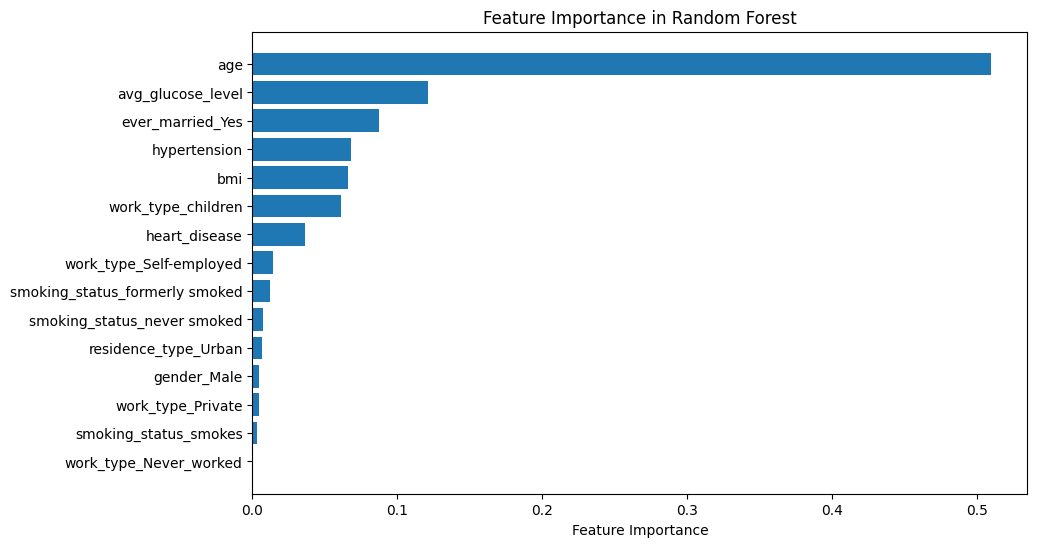

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # supaya feature terpenting di atas
plt.show()



## Model Comparision

# Conclusion

## Evaluasi Kinerja Model

### Tabel Evaluasi pada Data Train

| Model               | Accuracy | Precision | Recall | F1 Score | AUC  |
|---------------------|----------|-----------|--------|----------|------|
| Logistic Regression | 75%      | 13%       | 81%    | 22%      | 84%  |
| SVM                 | 73%      | 13%       | 82%    | 22%      | 84%  |
| Random Forest       | 68%      | 11%       | 84%    | 19%      | 83%  |

### Tabel Evaluasi pada Data Test

| Model               | Accuracy | Precision | Recall | F1 Score | AUC  |
|---------------------|----------|-----------|--------|----------|------|
| Logistic Regression | 74%      | 13%       | 80%    | 23%      | 84%  |
| SVM                 | 72%      | 13%       | 82%    | 22%      | 84%  |
| Random Forest       | 66%      | 11%       | 82%    | 19%      | 82%  |


# Analisis Model Prediksi Risiko Stroke

Dalam analisis ini, berbagai model machine learning dievaluasi untuk memprediksi risiko stroke, dengan fokus utama pada penanganan data yang tidak seimbang. Model yang digunakan meliputi Logistic Regression, SVM, dan Random Forest, baik tanpa maupun dengan teknik SMOTE, serta GridSearch untuk menangani ketimpangan kelas dan mengoptimalkan performa model.

---

## Temuan Utama

### 1. Kinerja Model
Setelah proses tuning, SVM menunjukkan performa terbaik dengan recall 82% dan AUC 84%, serta hasil yang konsisten antara data train dan test.

Hal ini sangat penting dalam konteks prediksi stroke, karena recall yang tinggi berarti model mampu mendeteksi lebih banyak kasus stroke yang sebenarnya — meminimalkan risiko gagal identifikasi pada pasien berisiko tinggi.

### 2. Fitur yang Paling Berpengaruh
Beberapa fitur yang paling konsisten muncul sebagai indikator penting di berbagai model adalah:

- Usia
- Rata-rata tingkat glukosa
- Jenis pekerjaan

Fitur-fitur ini juga sejalan dengan pengetahuan medis terkait faktor risiko stroke.

---